혐오 표현 챗봇 TF-IDF 사용

# 데이터 불러오기

In [ ]:
!pip install scikit-learn konlpy
import pandas as pd

In [ ]:
from google.colab import files

# 파일 업로드
uploaded = files.upload()

Saving train.txt to train.txt


In [ ]:
uploaded = files.upload()

Saving valid.txt to valid.txt


In [ ]:
uploaded = files.upload()

Saving test.txt to test.txt


In [ ]:
# train 데이터셋을 데이터프레임으로 만들어준다
train_data = []

with open('train.txt', 'r', encoding='utf-8') as file:
    for line in file:
        label, text = line.strip().split('\t')
        train_data.append((text, label))

train_df = pd.DataFrame(train_data, columns=['label', 'document'])
train_df.head()

train_df = train_df.iloc[1:]
train_df.head()

,label,document
1,"2,4","""자한당틀딱들.. 악플질 고만해라."""
2,8,정치적으로 편향된 평론한은 분은 별로...
3,2,적당히좀 쳐먹지.그랬냐??? 안그래도 문재인 때문에 나라 엉망진창인데...
4,4,"""안서는 아재들 풀발기 ㅋㄲㅋ"""
5,8,우와 ㅋ 능력자


In [ ]:
# valid 데이터셋을 데이터프레임으로 만들어준다
valid_data = []

with open('valid.txt', 'r', encoding='utf-8') as file:
    for line in file:
        label, text = line.strip().split('\t')
        valid_data.append((text, label))

valid_df = pd.DataFrame(valid_data, columns=['label', 'document'])
valid_df

valid_df = valid_df.iloc[1:]
valid_df.head()

,label,document
1,8,서로만이 이렇게 있을때 보기 좋다♥
2,8,승호 키스신에 누나는 웁니다..흑흑..너무 찐하쟈너..무방비상태였는데 충격먹음..손...
3,"1,3","""미친돼지새끼 육갑떠네 ㅡㅡ"""
4,3,"""전광훈이 교주 됐네 ㅋㅋㅋ 애라이 새꺄 니가 목사면 박쥐가 독수리다 임마"""
5,8,인덕션 꾹 누를때 기절하는줄ㅋㅋㅋ 아재개그통한다


In [ ]:
# test 데이터셋을 데이터프레임으로 만들어준다
test_data = []

with open('test.txt', 'r', encoding='utf-8') as file:
    for line in file:
        label, text = line.strip().split('\t')
        test_data.append((text, label))

test_df = pd.DataFrame(test_data, columns=['label', 'document'])
test_df

test_df = test_df.iloc[1:]
test_df.head()

,label,document
1,8,그만큼 길예르모가 잘했다고 보면되겠지 기대되네 셰이프 오브 워터
2,"2,3","""1. 8넘의 문재앙"""
3,2,"""문재인 정권의 내로남불은 타의 추종을 불허하네. 자한당 욕할거리도 없음."""
4,0,"""짱개들 지나간 곳은 폐허된다 ㅋㅋ"""
5,8,곱창은 자갈치~~~~~


In [ ]:
# 한국어 자연어처리를 위한 konlpy 패키지
from konlpy.tag import Okt
okt = Okt()

In [ ]:
# Training data에 적용해본다
def preprocess_text(text):

  tokens = okt.morphs(text)
  return ' '.join(tokens)

train_df['preprocessed_text'] = train_df['document'].apply(preprocess_text)

train_df.head()

,label,document,preprocessed_text
1,"2,4","""자한당틀딱들.. 악플질 고만해라.""",""" 자 한 당 틀 딱 들 .. 악플 질 고만해라 ."""
2,8,정치적으로 편향된 평론한은 분은 별로...,정치 적 으로 편향 된 평론 한 은 분 은 별로 ...
3,2,적당히좀 쳐먹지.그랬냐??? 안그래도 문재인 때문에 나라 엉망진창인데...,적당히 좀 쳐 먹지 . 그랬냐 ??? 안 그래도 문재인 때문 에 나라 엉망 진창 인...
4,4,"""안서는 아재들 풀발기 ㅋㄲㅋ""",""" 안 서는 아 재 들 풀 발기 ㅋㄲㅋ """
5,8,우와 ㅋ 능력자,우와 ㅋ 능력자


In [ ]:
# Valid data와 Test data에도 적용
valid_df['preprocessed_text'] = valid_df['document'].apply(preprocess_text)
test_df['preprocessed_text'] = test_df['document'].apply(preprocess_text)

test_df.head()
valid_df.head()


,label,document,preprocessed_text
1,8,서로만이 이렇게 있을때 보기 좋다♥,서로 만이 이렇게 있을 때 보기 좋다 ♥
2,8,승호 키스신에 누나는 웁니다..흑흑..너무 찐하쟈너..무방비상태였는데 충격먹음..손...,승호 키스신 에 누나 는 웁니 다 .. 흑 흑 .. 너무 찐하쟈너 .. 무방비 상태...
3,"1,3","""미친돼지새끼 육갑떠네 ㅡㅡ""",""" 미친 돼지 새끼 육갑 떠네 ㅡㅡ """
4,3,"""전광훈이 교주 됐네 ㅋㅋㅋ 애라이 새꺄 니가 목사면 박쥐가 독수리다 임마""",""" 전광훈 이 교주 됐네 ㅋㅋㅋ 애 라이 새꺄 니 가 목사 면 박쥐 가 독수리 다 ..."
5,8,인덕션 꾹 누를때 기절하는줄ㅋㅋㅋ 아재개그통한다,인덕션 꾹 누를 때 기절 하는줄 ㅋㅋㅋ 아 재개 그 통한 다


In [ ]:
valid_df.head()

,label,document,preprocessed_text
1,8,서로만이 이렇게 있을때 보기 좋다♥,서로 만이 이렇게 있을 때 보기 좋다 ♥
2,8,승호 키스신에 누나는 웁니다..흑흑..너무 찐하쟈너..무방비상태였는데 충격먹음..손...,승호 키스신 에 누나 는 웁니 다 .. 흑 흑 .. 너무 찐하쟈너 .. 무방비 상태...
3,"1,3","""미친돼지새끼 육갑떠네 ㅡㅡ""",""" 미친 돼지 새끼 육갑 떠네 ㅡㅡ """
4,3,"""전광훈이 교주 됐네 ㅋㅋㅋ 애라이 새꺄 니가 목사면 박쥐가 독수리다 임마""",""" 전광훈 이 교주 됐네 ㅋㅋㅋ 애 라이 새꺄 니 가 목사 면 박쥐 가 독수리 다 ..."
5,8,인덕션 꾹 누를때 기절하는줄ㅋㅋㅋ 아재개그통한다,인덕션 꾹 누를 때 기절 하는줄 ㅋㅋㅋ 아 재개 그 통한 다


# 기본 통계 확인

In [ ]:
# 데이터셋 안에 있는 샘플의 개수 확인해본다
print(f"트레이닝 샘플 개수: {train_df.shape[0]}")
print(f"검증 샘플 개수: {valid_df.shape[0]}")
print(f"테스트 샘플 개수: {test_df.shape[0]}")

# 레이블의 개수와 레이블의 분포를 확인해본다
print(f"레이블: {train_df['label'].nunique()}")
print(f"레이블 분포:\n{train_df['label'].value_counts()}")

# 평균 문장 길이
train_df['sentence_length'] = train_df['preprocessed_text'].apply(lambda x: len(x.split()))
print(f"평균 문장 길이: {train_df['sentence_length'].mean()}")


트레이닝 샘플 개수: 78977
검증 샘플 개수: 8776
테스트 샘플 개수: 21939
레이블: 80
레이블 분포:
label
8          42909
3           6359
2           4967
0           4083
1           3930
           ...  
1,3,7          1
0,2,3,7        1
1,2,3,5        1
0,2,4,5        1
0,1,6          1
Name: count, Length: 80, dtype: int64
평균 문장 길이: 14.420109652177215


# 1) Training data에서 가장 흔하게 등장하는 단어들은 무엇이 있을까?

(여자, 남자)

In [ ]:
from collections import Counter

# 훈련 데이터셋안에 있는 모든 단어들에 대해 리스트를 만든다
all_words = ' '.join(train_df['preprocessed_text']).split()

# 각 단어의 빈도를 측정해본다
word_freq = Counter(all_words)

# 가장 흔한 단어들은? 10개만 뽑아본다
print(f"Most common words: {word_freq.most_common(10)}")

# 단어 빈도 플롯
import matplotlib.pyplot as plt

top_words = dict(word_freq.most_common(10))
# plt.bar(top_words.keys(), top_words.values())
# plt.title("Top 10 Most Common Words")
# plt.show()

Most common words: [('"', 47311), ('이', 25657), ('들', 25175), ('.', 17842), ('가', 13591), ('은', 11414), ('에', 10718), ('?', 10455), ('도', 10235), ('는', 9594)]


Most common words: [('이', 25657), ('들', 25175), ('가', 13591), ('은', 11414), ('에', 10718), ('도', 10235), ('는', 9594), ('을', 7172), ('다', 6329), ('여자', 5228)]


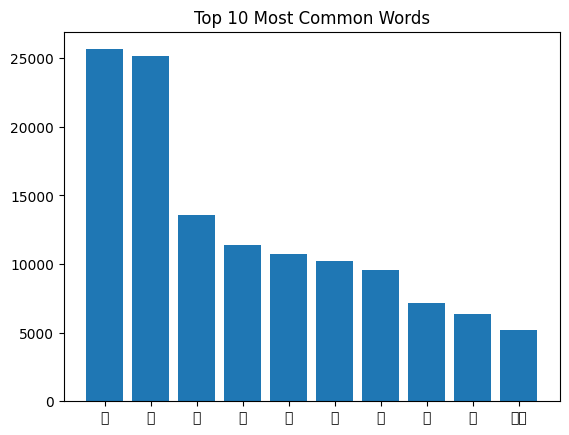

In [ ]:
import re
from collections import Counter

# Create a list of all words, removing punctuation
all_words = ' '.join(train_df['preprocessed_text']).split()

# Filter out punctuation and special characters using a regex
all_words = [word for word in all_words if re.match(r'[가-힣]+', word)]  # Only keep Korean characters

# Get the frequency of each word
word_freq = Counter(all_words)

# Display the most common words
print(f"Most common words: {word_freq.most_common(10)}")

# Optional: Plot word frequencies
import matplotlib.pyplot as plt

top_words = dict(word_freq.most_common(10))
plt.bar(top_words.keys(), top_words.values())
plt.title("Top 10 Most Common Words")
plt.show()


한글 폰트를 제공하지 않는다

In [ ]:
!pip install hangul-romanize

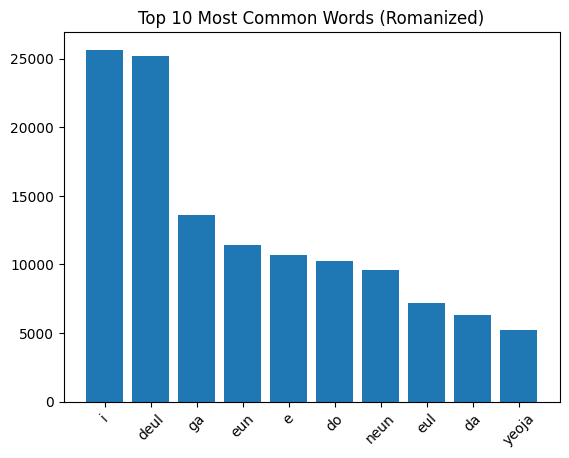

In [ ]:
from hangul_romanize import Transliter
from hangul_romanize.rule import academic

# Initialize the Transliter object with academic rules for romanization
transliter = Transliter(academic)

# Function to romanize Korean words
def romanize_korean(word):
    try:
        return transliter.translit(word)
    except:
        return word  # If there's any error, return the word as it is (likely it's not Korean)

# Romanize the words before plotting
top_words = {romanize_korean(word): freq for word, freq in word_freq.most_common(10)}

# Plot the graph
import matplotlib.pyplot as plt
plt.bar(top_words.keys(), top_words.values())
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title("Top 10 Most Common Words (Romanized)")
plt.show()


# 1-1 )대부분 혐오표현과 의미없는 표현들로, 의미없는 분석이다

In [ ]:
# List of common Korean stopwords
stopwords = ['이', '가', '을', '를', '은', '는', '들', '에', '도', '로', '과', '와', '의', '하고', '한', '저', '나', '그']

# 단어집합에서 stopwords들을 빼준다
all_words_filtered = [word for word in all_words if word not in stopwords and len(word) > 1]

# 빈도측정
word_freq_filtered = Counter(all_words_filtered)

# 의미있는 단어들을 뽑아본다
print(f"Most common meaningful words: {word_freq_filtered.most_common(30)}")
print(type(word_freq_filtered))

Most common meaningful words: [('여자', 5228), ('으로', 3585), ('진짜', 3355), ('남자', 3345), ('사람', 3240), ('하는', 2930), ('에서', 2889), ('얼굴', 2383), ('이다', 2084), ('너무', 1960), ('새끼', 1945), ('돼지', 1935), ('한국', 1864), ('한테', 1799), ('그냥', 1736), ('댓글', 1719), ('인데', 1676), ('이나', 1635), ('같은', 1488), ('나라', 1476), ('생각', 1465), ('나이', 1447), ('중국', 1436), ('재앙', 1428), ('이런', 1408), ('문재인', 1398), ('까지', 1315), ('기사', 1279), ('전라도', 1274), ('하면', 1267)]
<class 'collections.Counter'>


In [ ]:
df_word_freq = pd.DataFrame(word_freq_filtered.items(), columns=['Word', 'Frequency'])

# 데이터프레임으로 만들어서 빈도순으로
df_word_freq_sorted = df_word_freq.sort_values(by='Frequency', ascending=False)


print(df_word_freq_sorted.head(40))


     Word  Frequency
180    여자       5228
3      으로       3585
213    진짜       3355
67     남자       3345
49     사람       3240
63     하는       2930
225    에서       2889
570    얼굴       2383
263    이다       2084
1331   너무       1960
158    새끼       1945
132    돼지       1935
66     한국       1864
551    한테       1799
182    그냥       1736
118    댓글       1719
16     인데       1676
508    이나       1635
130    같은       1488
13     나라       1476
1299   생각       1465
1016   나이       1447
101    중국       1436
419    재앙       1428
362    이런       1408
11    문재인       1398
194    까지       1315
117    기사       1279
536   전라도       1274
368    하면       1267
218    결혼       1256
23     보다       1249
490    이네       1219
736   드라마       1112
396    이제       1081
102    무슨       1060
370    같이        983
421   연예인        979
681   신천지        971
1192   해서        964


**레이블의 분포도는 어떨까?**

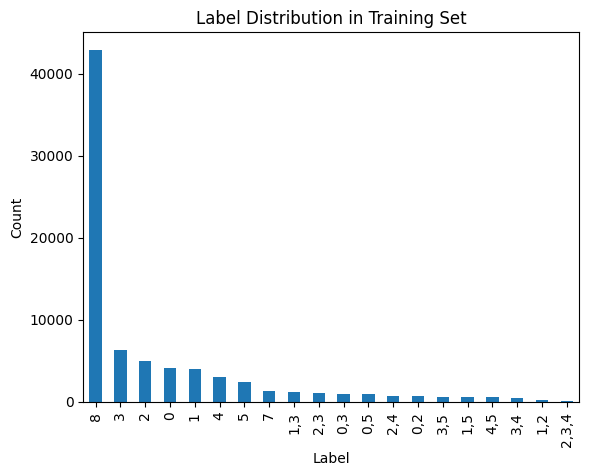

In [ ]:
plt.rcdefaults()

# 각 레이블의 빈도를 센다
label_counts = train_df['label'].value_counts()

# 레이블 분포 플로팅
label_counts.head(20).plot(kind='bar', title='Label Distribution in Training Set')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# 2) 레이블의 분포도와 단어 빈도와는 관계가 있나? <br>
(found potential mislabelling in the dataset for words like 여자/남자)

빈도로 봤을 땐 남자, 여자와 같은 성차별에 해당할 수 있는 단어들이 높은 빈도로 나타나는데 <br>
막상 성차별에 해당하는 5번 레이블에 대한 분포는 낮게 나온다. <br>
혹시 해당 단어들이 3번 레이블인 혐오 욕설에 들어가있나?

In [ ]:
from collections import Counter

# Step 1: Filter the dataset for instances with label 3
# Assuming 'label' contains the specific label you're looking for (e.g., 'label_3')
label_3_data = train_df[train_df['label'] == '3']  # Adjust this if your label column is numeric or categorical

stopwords = ['이', '가', '을', '를', '은', '는', '들', '에', '도', '로', '과', '와', '의', '하고', '한', '저', '나', '그']

# Step 2: Combine all words for label 3 into a single list
all_words_label_3 = ' '.join(label_3_data['preprocessed_text']).split()

all_words_label_3_filtered = [word for word in all_words_label_3 if word not in stopwords and len(word) > 1]


# Step 3: Calculate the word frequencies for label 3
word_freq_label_3_filtered = Counter(all_words_label_3_filtered)


df_word_freq_label3 = pd.DataFrame(word_freq_label_3_filtered.items(), columns=['Word', 'Frequency'])

# Sort the DataFrame by 'Frequency' in descending order
df_word_freq_label3_sorted = df_word_freq_label3.sort_values(by='Frequency', ascending=False)

# Display the sorted DataFrame
print(df_word_freq_label3_sorted.head(20))


    Word  Frequency
54    새끼        758
200   ..        510
264  ...        494
52    ㅋㅋ        447
191   지랄        411
158   진짜        310
268  ㅋㅋㅋ        296
64    존나        269
226   ㅈㄹ        264
126   으로        251
78    하는        245
41    같은        225
12    사람        218
417   이나        217
95    에서        211
160   한테        199
328   이네        197
23   OOO        189
73    ㅈㄴ        188
395   ㅅㅂ        183


거의 없는 것이 확인되었다 <br>
그럼 성 차별 레이블인 5에는 어떤 단어들이 들어가 있는가?

```
# 코드로 형식 지정됨
```



In [ ]:
from collections import Counter

# Step 1: Filter the dataset for instances with label 3
# Assuming 'label' contains the specific label you're looking for (e.g., 'label_3')
label_5_data = train_df[train_df['label'] == '5']  # Adjust this if your label column is numeric or categorical

stopwords = ['이', '가', '을', '를', '은', '는', '들', '에', '도', '로', '과', '와', '의', '하고', '한', '저', '나', '그']

# Step 2: Combine all words for label 3 into a single list
all_words_label_5 = ' '.join(label_5_data['preprocessed_text']).split()

all_words_label_5_filtered = [word for word in all_words_label_5 if word not in stopwords and len(word) > 1]


# Step 3: Calculate the word frequencies for label 3
word_freq_label_5_filtered = Counter(all_words_label_5_filtered)


df_word_freq_label5 = pd.DataFrame(word_freq_label_5_filtered.items(), columns=['Word', 'Frequency'])

# Sort the DataFrame by 'Frequency' in descending order
df_word_freq_label5_sorted = df_word_freq_label5.sort_values(by='Frequency', ascending=False)

# Display the sorted DataFrame
print(df_word_freq_label5_sorted.head(20))


    Word  Frequency
31    여자       1219
44    남자        700
127   ..        291
253   ㅋㅋ        210
91   ...        201
92    댓글        151
102   페미        135
392  ㅋㅋㅋ        131
220   하는        127
88    으로        122
158   맘충        120
213   에서        120
268  빠순이        115
32    진짜        105
170   결혼         98
122   한테         97
134   이다         91
290   계집         89
242   여성         86
340   사람         84


들어가 있지만, 나머지 4천개의 여자나 남자 단어들은 어디 있는것인가?

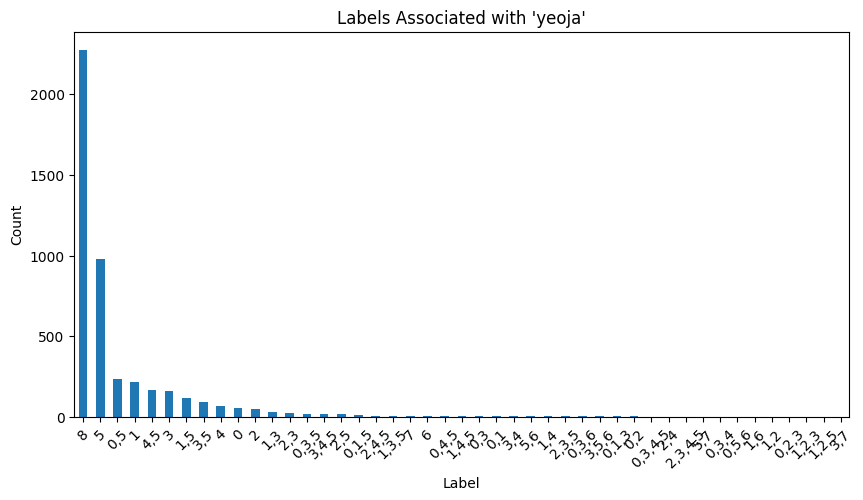

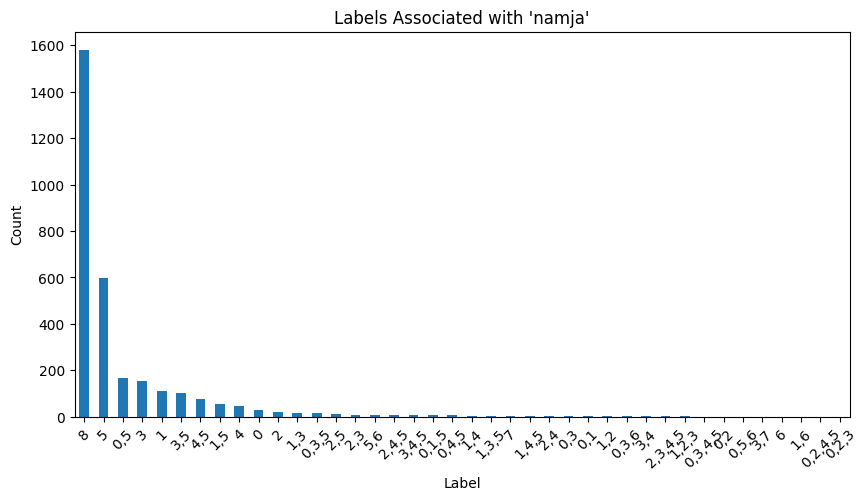

In [ ]:
# Step 1: Filter rows where '여자' or '남자' appear in the text
filtered_data_woman = train_df[train_df['preprocessed_text'].str.contains('여자', na=False)]
filtered_data_man = train_df[train_df['preprocessed_text'].str.contains('남자', na=False)]

# Step 2: Count the occurrences of each label for '여자' and '남자'
woman_label_counts = filtered_data_woman['label'].value_counts()
man_label_counts = filtered_data_man['label'].value_counts()




# Optional: Plot the label distribution for each word
import matplotlib.pyplot as plt

# Plot for '여자'
plt.figure(figsize=(10, 5))
woman_label_counts.plot(kind='bar', title="Labels Associated with 'yeoja'")
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot for '남자'
plt.figure(figsize=(10, 5))
man_label_counts.plot(kind='bar', title="Labels Associated with 'namja'")
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


레이블 8인, 혐오 표현이 아닌 곳에서 가장 많이 나타났다고 볼 수 있다 <br>
그렇다면, 혐오 표현이지만 혐오 표현이라고 잘못 레이블링된 문장들도 있지 않을까? <br>
레이블 8을 살펴보자

In [ ]:
label_8_data = train_df[train_df['label'] == '8']

label_8_with_yeojanamja = label_8_data[label_8_data['preprocessed_text'].str.contains('여자|남자', na=False)]

label_8_with_yeojanamja[['preprocessed_text']].head(30)

,preprocessed_text
11,공통점 은 한국 남자 ?
36,근데 더러운건 지 디 인데 왜 여자 욕 만 함 ㅋㅋ
61,어린 여자 만나야 하는 건가 ..
64,남자 도 성형 이 많다니 .. 성형 공화국 답 다
92,화장 안 한 얼굴 이 훨씬 이쁜것 같음 . 실제 로 보니 몸매 도 날씬한것 같 드 ...
100,송지효 남친 있지 앜 ㅎ 음 ? 그 말죽거리 남자 매니저 엿 던애
121,여자 얼굴값 하게 생긴네 .. 색 기도 많아 보이 고 ... 남자 가 불쌍타 .. ㅉㅉ
139,남자 만 불리해
142,남자 가 봐도 ㅈㄴ 잘생겼는데 수염 은 깎자 ... 리틀 소지섭 별명 이 있지만 수...
176,자식 을 낳았으면 어떻 게 든 책임 을 져야지 .. 자식 입장 에선 똑같은 자식 인...


혐오 표현으로 느껴지는 몇몇 문장들이 존재한다 <br>
11 : 공통점 은 한국 남자 ? <br>
291 : 역시 여자 는 어려야

그렇다면 왜 해당 표현들은 혐오 표현으로 분류되지 않았을까? <br>
성 차별 레이블에 속하는 여자/남자가 들어가는 단어들을 분석해보았다

In [ ]:
label_5_data = train_df[train_df['label'] == '5']

label_5_with_yeojanamja = label_5_data[label_5_data['preprocessed_text'].str.contains('여자|남자', na=False)]

label_5_with_yeojanamja[['preprocessed_text']].head(40)

,preprocessed_text
32,도대체 ㅋㅋㅋㅋ 어디서 방송사 갑질 이 튀어나온거 ?? 지금 까지 밝혀진 사실 은 ...
72,여자 가 남자 궁뎅 이 만 지면 결론 은 그럴수도 있지 남자 가 쪼잔하 게 따지냐 ...
108,찌찌 자유 이벤트 보단 이런 곳 에 가는 여자 들 단속 이 페미니즘 적 으로 더 건...
170,네이버 도 페미 잡것 들 이 점령 을 했군요 앞 으로 남자 들 도 어떤 신체 접촉 ...
211,악플러 들 특징 거의 여자 들 이 글 씀
286,이제 남자 들 이 불쌍해지기 시작 한 다
296,"피해자 한테 얼평 , 몸 평이 나 하고 있는 남자 들 수준 .. 진짜 진절머리 난다"
306,돈 많고 시간 많은 남자 는 99 퍼 바람 이다 진리 임
330,어디 무서워서 여자 들 이랑 직장 생활 같이 하겠냐 ?
520,남자 는 하늘 여자 는 땅 이니 당연히 갓 더 가든 이 우승 이지


수위에서 차이가 있을수도 있지만 혐오 표현이 아니라고 레이블링이 된 문장들 조차도 성차별로 여겨질 수 있다 <br>
그렇다면 궁금해진 것이 또 잘못 레이블링이 된 문장들이 존재할 수 있지 않을까? <br>
알아보기 위해 레이블 8에 가장 자주 나오는 단어들을 살펴본다

In [ ]:
from collections import Counter

# Step 1: Filter the dataset for instances with label 3
# Assuming 'label' contains the specific label you're looking for (e.g., 'label_3')
label_8_data = train_df[train_df['label'] == '8']  # Adjust this if your label column is numeric or categorical

stopwords = ['이', '가', '을', '를', '은', '는', '들', '에', '도', '로', '과', '와', '의', '하고', '한', '저', '나', '그']

# Step 2: Combine all words for label 3 into a single list
all_words_label_8 = ' '.join(label_8_data['preprocessed_text']).split()

all_words_label_8_filtered = [word for word in all_words_label_8 if word not in stopwords and len(word) > 1]


# Step 3: Calculate the word frequencies for label 3
word_freq_label_8_filtered = Counter(all_words_label_8_filtered)


df_word_freq_label8 = pd.DataFrame(word_freq_label_8_filtered.items(), columns=['Word', 'Frequency'])

# Sort the DataFrame by 'Frequency' in descending order
df_word_freq_label8_sorted = df_word_freq_label8.sort_values(by='Frequency', ascending=False)

# Display the sorted DataFrame
print(df_word_freq_label8_sorted.head(20))

      Word  Frequency
75      ..       5582
5      ...       4303
109     여자       2442
442     사람       2226
99      ㅋㅋ       2088
1       으로       2057
125     진짜       1901
507     에서       1718
28      남자       1666
763     너무       1508
176     하는       1464
262     얼굴       1373
65     ㅋㅋㅋ       1306
108     인데       1060
122     그냥       1022
163   ....        923
1328    생각        916
847     ??        911
205     ~~        900
691     이다        896


얼굴이 들어가는 문장들을 살펴보는 것이 좋을 것 같다. <br>
해당 단어는 외모 차별 (레이블 1) 에 해당할 수도 있기에

In [ ]:
label_8_data = train_df[train_df['label'] == '8']

label_8_with_face = label_8_data[label_8_data['preprocessed_text'].str.contains('얼굴', na=False)]

label_8_with_face[['preprocessed_text']].head(20)

,preprocessed_text
92,화장 안 한 얼굴 이 훨씬 이쁜것 같음 . 실제 로 보니 몸매 도 날씬한것 같 드 ...
121,여자 얼굴값 하게 생긴네 .. 색 기도 많아 보이 고 ... 남자 가 불쌍타 .. ㅉㅉ
122,제 입장 에선 오징어 를 문어 라고 속 이고 주방 에 얼굴 에 뭐 바르고 출근 한 ...
300,무슨 핑계 로 손 을 대는 상관 할 바 아니지만 어느 순간 OOO 에 얼굴 흘러내린...
319,이건 여자 들 얼굴 들 에 침뱉는격 ...
345,친구 보다 얼굴 이 작은 유역비 ♥ 자연미인
382,얼굴 이 살찐 소유 같아서 깜놀
428,"왜캐 빈정대는 사람 들 이 많냨 거울 이나 보고 니 들 얼굴 , 패션센스 나 걱정 ..."
446,얼굴 왜 저래
450,자기 얼굴 가지 고 자기 마음대로 하겠다는데 오지 라 퍼 들 많네 많아 ㅎㅎㅎ


646 : 와.. 저 얼굴 이 일본 에선 아이돌 이라 하는구나 ㅋㅋㅋ <br>
1329 : 얼굴 은? 90년 대같앗으면 티비 에 나오지도 못 할 얼굴 <br>
와 같이 외모 차별에 해당한다고 생각하는 단어들이 존재한다

# 3) 각각 레이블에 대해 어떤 단어들이 가장 많이 등장하는지가 궁금해졌다

In [ ]:
stopwords = ['이', '가', '을', '를', '은', '는', '들', '에', '도', '으로', '에서',
             '과', '와', '하고', '한', '저', '나', '우리', '그', '그녀', '너', '너희',
             '그리고', '하지만', '그러나', '그래서', '또한', '너무', '매우', '또',
             '아주', '대부분', '사람', '것', '때', '말', '보다', '정말', '뭐',
             '그렇다', '그거', '하다', '있다', ',', '..', '...', 'ㅋㅋ', ', .', ' .']

import pandas as pd
from collections import Counter

# Initialize an empty list to store data for each label
data = []

# Loop through each unique label in the dataset
for label in train_df['label'].unique():
    # Filter the dataset for the current label
    label_data = train_df[train_df['label'] == label]

    # Combine all words from the 'preprocessed_text' column for the current label
    all_words = ' '.join(label_data['preprocessed_text']).split()

    # Remove stopwords from the list of words
    filtered_words = [word for word in all_words if word not in stopwords]

    # Count the frequency of the remaining words
    word_freq = Counter(filtered_words)

    # Get the 10 most common words for this label
    most_common_words = [word for word, freq in word_freq.most_common(10)]

    # Add the label and the list of words to the data
    data.append({'Label': label, 'Words': ', '.join(most_common_words)})

# Convert the data list to a DataFrame
word_freq_df = pd.DataFrame(data)

# Display the DataFrame
word_freq_df

,Label,Words
0,"2,4",""", 틀, 딱, 대, ., 자, 네, ?, 당, 태극기"
1,8,""", ., ?, 다, 안, 의, 여자, 로, 만, 왜"
2,2,""", 문, ., 재앙, 문재인, ?, 의, 다, 아, ."""
3,4,""", 틀, 딱, 나이, ., ?, 아, 대, 네, 다"
4,3,""", ., ?, 새끼, 년, 아, 다, 니, 지, 네"
...,...,...
75,"0,2,3,7","., 개독, 짓, 곽, 짱개, 넘, 문죄인, 한테, 자리, 받고"
76,"1,7",""", ., 철면피, 썼구나, 면상, 역겹다, 곱, 게, 미쳐라, 개독"
77,"1,2,3,5",""", 김치, 년, 보지, 들은, 사회, 악, 이다, 닭, 근혜"
78,"0,2,4,5",""", 의, 한국, 사회, 못, 난, 남자, 군상, 대한문, 앞"


# 3-1) 아래는 인덱스에 따른 자주 등장한 단어들

In [ ]:
print("출신 차별")
word_freq_df[word_freq_df['Label'] == '0']

출신 차별


,Label,Words
6,0,""", ., 짱깨, ?, 쪽바리, 전라도, 중국, 다, 짱개, ."""


In [ ]:
print("외모 차별")
word_freq_df[word_freq_df['Label'] == '1']

외모 차별


,Label,Words
11,1,""", 못, ., 얼굴, 돼지, ?, 생긴, 진짜, 다, 네"


In [ ]:
print("정치성향 차별")
word_freq_df[word_freq_df['Label'] == '2']

정치성향 차별


,Label,Words
2,2,""", 문, ., 재앙, 문재인, ?, 의, 다, 아, ."""


In [ ]:
print("혐오 욕설")
word_freq_df[word_freq_df['Label'] == '3']

혐오 욕설


,Label,Words
4,3,""", ., ?, 새끼, 년, 아, 다, 니, 지, 네"


In [ ]:
print("연령 차별")
word_freq_df[word_freq_df['Label'] == '4']

연령 차별


,Label,Words
3,4,""", 틀, 딱, 나이, ., ?, 아, 대, 네, 다"


In [ ]:
print("성 차별")
word_freq_df[word_freq_df['Label'] == '5']

성 차별


,Label,Words
8,5,"여자, "", ., 남자, ?, 다, 의, 만, 안, 댓글"


In [ ]:
print("인종 차별")
word_freq_df[word_freq_df['Label'] == '6']

인종 차별


,Label,Words
22,6,""", 흑인, ., 양키, 백인, 깜둥이, ."", 인, 놈, 양"


In [ ]:
print("종교 차별")
word_freq_df[word_freq_df['Label'] == '7']

종교 차별


,Label,Words
9,7,""", 개독, 신천지, 사이비, ., 종교, ."", 다, 예수, 개독교"


In [ ]:
print("혐오 표현x")
word_freq_df[word_freq_df['Label'] == '8']

혐오 표현x


,Label,Words
1,8,""", ., ?, 다, 안, 의, 여자, 로, 만, 왜"


# 4) mislabelling된 데이터가 눈에 걸린다. <br>
# 먼저 벡터화 및 모델 트레이닝을 해보고 Confusion Matrix를 살펴보면 어떨까? <br>
# false positive나 false negative가 높게 나온다면 <br>
# re-labelling이 가치가 있는 작업일 것이다

# 4-1) Binary Classification / Multi-class Classification

In [ ]:
# Count the total number of non-hate speech and hate speech samples
non_hate_speech_count = train_df[train_df['label'] == '8'].shape[0]  # Non-hate speech count
hate_speech_count = train_df[train_df['label'] != '8'].shape[0]  # Any other label is hate speech

# Total number of samples
total_samples = train_df.shape[0]

# Calculate percentages
non_hate_percentage = (non_hate_speech_count / total_samples) * 100
hate_speech_percentage = (hate_speech_count / total_samples) * 100

# Print the distribution
print(f"Total samples: {total_samples}")
print(f"Non-hate speech samples: {non_hate_speech_count} ({non_hate_percentage:.2f}%)")
print(f"Hate speech samples: {hate_speech_count} ({hate_speech_percentage:.2f}%)")


Total samples: 78977
Non-hate speech samples: 42909 (54.33%)
Hate speech samples: 36068 (45.67%)


Label이 40개가 넘고 레이블들도 서로 섞여있어서 너무 복잡해질 거 같아 Binary Classification이 나을 것 같다

# 4-2) Vectorization을 하기 전, binary label로 나눈다

In [ ]:
train_df['binary_label'] = train_df['label'].apply(lambda x: 0 if x == '8' else 1)  # Replace 'label_8' with your non-hate speech label
valid_df['binary_label'] = valid_df['label'].apply(lambda x: 0 if x == '8' else 1)
test_df['binary_label'] = test_df['label'].apply(lambda x: 0 if x == '8' else 1)

In [ ]:
valid_df.head(10)

,label,document,preprocessed_text,binary_label
1,8,서로만이 이렇게 있을때 보기 좋다♥,서로 만이 이렇게 있을 때 보기 좋다 ♥,0
2,8,승호 키스신에 누나는 웁니다..흑흑..너무 찐하쟈너..무방비상태였는데 충격먹음..손...,승호 키스신 에 누나 는 웁니 다 .. 흑 흑 .. 너무 찐하쟈너 .. 무방비 상태...,0
3,"1,3","""미친돼지새끼 육갑떠네 ㅡㅡ""",""" 미친 돼지 새끼 육갑 떠네 ㅡㅡ """,1
4,3,"""전광훈이 교주 됐네 ㅋㅋㅋ 애라이 새꺄 니가 목사면 박쥐가 독수리다 임마""",""" 전광훈 이 교주 됐네 ㅋㅋㅋ 애 라이 새꺄 니 가 목사 면 박쥐 가 독수리 다 ...",1
5,8,인덕션 꾹 누를때 기절하는줄ㅋㅋㅋ 아재개그통한다,인덕션 꾹 누를 때 기절 하는줄 ㅋㅋㅋ 아 재개 그 통한 다,0
6,1,못생긴대로 논다더니 ㅋㅋㅋㅋ,못 생긴대로 논다더니 ㅋㅋㅋㅋ,1
7,8,"""전라도 광주 아님 청와대 강력 추천 합니다 ^^~""",""" 전라도 광주 아님 청와대 강력 추천 합니다 ^^~""",0
8,8,조국하고 손잡고 감방가자,조국 하고 손잡고 감방 가자,0
9,8,정말 뻔한 스토리 노잼이다 홍보 그만좀해라 이제,정말 뻔한 스토리 노잼 이다 홍보 그만 좀해 라 이제,0
10,8,이아줌마 또 혼자 잘난척허시네 상대가 유명인 아니라서 미투하지도못하는 중소기업 일반...,이 아줌마 또 혼자 잘난 척 허시 네 상대 가 유명인 아니라서 미투 하지도 못 하는...,0


# 4-3) TF-IDF Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Ensure you are passing the correct column with the preprocessed text
train_text = train_df['preprocessed_text'].tolist()  # Extracting the text column for training
valid_text = valid_df['preprocessed_text'].tolist()  # Extracting the text column for validation
test_text = test_df['preprocessed_text'].tolist()    # Extracting the text column for testing

# Step 1: Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Set max_features based on your data

# Step 2: Fit the TF-IDF vectorizer on the training data and transform
X_train_tfidf = tfidf.fit_transform(train_text)

# Step 3: Transform the validation and test sets using the fitted vectorizer
X_valid_tfidf = tfidf.transform(valid_text)
X_test_tfidf = tfidf.transform(test_text)

# View the learned vocabulary (should be words from the text, not column names)
# print("TF-IDF vocabulary:", tfidf.get_feature_names_out())


print("Shape of TF-IDF training data:", X_train_tfidf.shape)
print("Shape of TF-IDF validation data:", X_valid_tfidf.shape)
print("Shape of TF-IDF test data:", X_test_tfidf.shape)

vocab = tfidf.get_feature_names_out()
print(type(vocab))
vocab[1500:1505]

Shape of TF-IDF training data: (78977, 5000)
Shape of TF-IDF validation data: (8776, 5000)
Shape of TF-IDF test data: (21939, 5000)
<class 'numpy.ndarray'>


array(['말아먹고', '말투', '맘대로', '맘충', '맙시'], dtype=object)

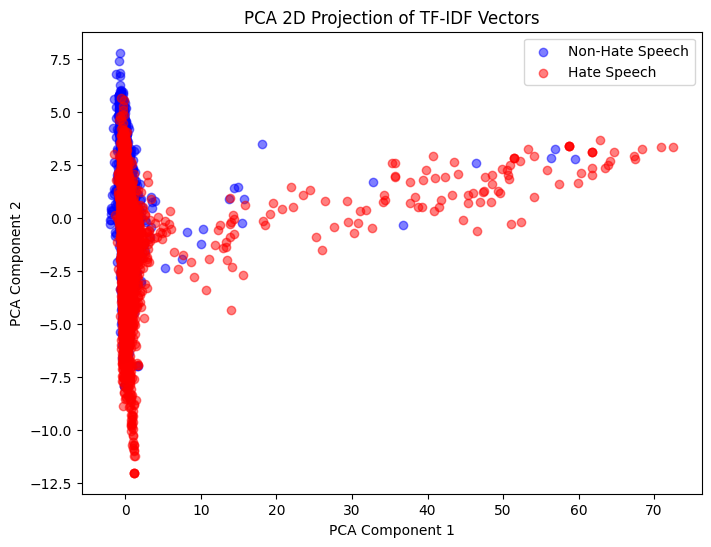

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


def binarize_label(label):
    # Check if the label is exactly '8'
    return 0 if label == '8' else 1

# Apply this function to the training and validation sets
y_train = train_df['label'].apply(binarize_label)

# TF-IDF로 벡터화된 X 데이터가 있다고 가정
# y는 0(비혐오) 또는 1(혐오)로 레이블링된 값
# X_train_tfidf와 y_train은 이미 준비된 데이터라고 가정합니다.

# 1. 데이터 정규화 (PCA 적용 전)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_tfidf.toarray())

# 2. PCA 적용 - 2차원으로 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


# 3. 시각화
plt.figure(figsize=(8,6))
plt.scatter(X_pca[y_train == 1, 0], X_pca[y_train == 1, 1], alpha=0.5, label='Non-Hate Speech', color='blue')
plt.scatter(X_pca[y_train == 0, 0], X_pca[y_train == 0, 1], alpha=0.5, label='Hate Speech', color='red')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA 2D Projection of TF-IDF Vectors')
plt.legend()
plt.show()



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Save the TF-IDF vectorizer to Google Drive
joblib.dump(tfidf, '/content/drive/MyDrive/tfidf_vectorizer.pkl')

Mounted at /content/drive


['/content/drive/MyDrive/tfidf_vectorizer.pkl']

In [ ]:
# 나중을 위해

# Load the TF-IDF vectorizer from Google Drive
tfidf = joblib.load('/content/drive/MyDrive/tfidf_vectorizer.pkl')
tfidf

TfidfVectorizer(max_features=5000)

# 4-4) Multi-Class Logistic Regression Model

In [ ]:
# 데이터프레임 Google Drive에 저장
train_df.to_pickle('/content/drive/MyDrive/train_df.pkl')
valid_df.to_pickle('/content/drive/MyDrive/valid_df.pkl')
test_df.to_pickle('/content/drive/MyDrive/test_df.pkl')


In [ ]:
# train, valid, test 데이터프레임 불러온다
train_df = pd.read_pickle('/content/drive/MyDrive/train_df.pkl')
valid_df = pd.read_pickle('/content/drive/MyDrive/valid_df.pkl')
test_df = pd.read_pickle('/content/drive/MyDrive/test_df.pkl')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


y_train = train_df['label']
y_valid = valid_df['label']

# Step 1: Train a binary classifier using the vectorized training data
clf = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
clf.fit(X_train_tfidf, y_train)

# Step 2: Make predictions on the validation set
y_pred = clf.predict(X_valid_tfidf)

# Step 3: Evaluate the model using a classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_valid, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred))

# Optionally, save the trained model to Google Drive
# joblib.dump(clf, '/content/drive/MyDrive/logistic_regression_model.pkl')

Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.64      0.52      0.57       424
         0,1       0.00      0.00      0.00         7
       0,1,2       0.00      0.00      0.00         2
       0,1,3       0.00      0.00      0.00         3
     0,1,3,4       0.00      0.00      0.00         1
     0,1,3,5       0.00      0.00      0.00         2
     0,1,4,5       0.00      0.00      0.00         1
       0,1,5       0.00      0.00      0.00         6
         0,2       0.62      0.23      0.34        78
       0,2,3       0.00      0.00      0.00        19
     0,2,3,5       0.00      0.00      0.00         1
       0,2,5       0.00      0.00      0.00         1
       0,2,6       0.00      0.00      0.00         1
       0,2,7       0.00      0.00      0.00         1
         0,3       0.76      0.17      0.27        96
       0,3,4       0.00      0.00      0.00         3
     0,3,4,5       0.00      0.00      0.00         1
       0,3,5       0.00    

Low Macro F1-score : 0.13 <br>
44%의 hate speech에 대해 잘 판단을 하지 못 한다 <br>


**무엇이 문제일까?**

> 데이터 불균형? <br>
데이터가 너무 겹쳐있다

> Low Macro F1-score : 0.13 <br>
몇몇 레이블에 대해서는 precision, recall이 0으로 아예 맞추지 못하였다


# 4-5) Binary Logistic Regression Model

In [ ]:
valid_df['label'].value_counts()

,count
label,
8,4887
3,727
2,547
1,440
0,424
4,334
5,275
"1,3",138
7,118


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Binarize the labels: 1 for label 8, 0 for all other labels
def binarize_label(label):
    # Check if the label is exactly '8'
    return 1 if label == '8' else 0

# Apply this function to the training and validation sets
y_train = train_df['label'].apply(binarize_label)
y_valid = valid_df['label'].apply(binarize_label)



# Step 1: Train a binary classifier using the vectorized training data
clf2 = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
clf2.fit(X_train_tfidf, y_train)

# Step 2: Make predictions on the validation set
y_pred = clf2.predict(X_valid_tfidf)

# Step 3: Evaluate the model using a classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_valid, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred))

# Optionally, save the trained model to Google Drive
# joblib.dump(clf, '/content/drive/MyDrive/logistic_regression_model.pkl')


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.70      0.75      3889
           1       0.78      0.87      0.83      4887

    accuracy                           0.80      8776
   macro avg       0.80      0.79      0.79      8776
weighted avg       0.80      0.80      0.79      8776

Confusion Matrix:
[[2719 1170]
 [ 625 4262]]


In [ ]:
import joblib
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

joblib.dump(clf2, '/content/drive/MyDrive/binary_logistic_regression_model.pkl')
#clf2 = joblib.load('/content/drive/MyDrive/tfidf_vectorizer.pkl')



Mounted at /content/drive


['/content/drive/MyDrive/binary_logistic_regression_model.pkl']

**(1) 모델이 overfitting / underfitting 하진 않은지?**



In [ ]:
# Predict on the training set
y_train_pred = clf2.predict(X_train_tfidf)

# Evaluate the performance on the training set
print("Training Set Performance:")
print(classification_report(y_train, y_train_pred))

Training Set Performance:
              precision    recall  f1-score   support

           0       0.85      0.74      0.79     36068
           1       0.80      0.89      0.84     42909

    accuracy                           0.82     78977
   macro avg       0.83      0.82      0.82     78977
weighted avg       0.82      0.82      0.82     78977



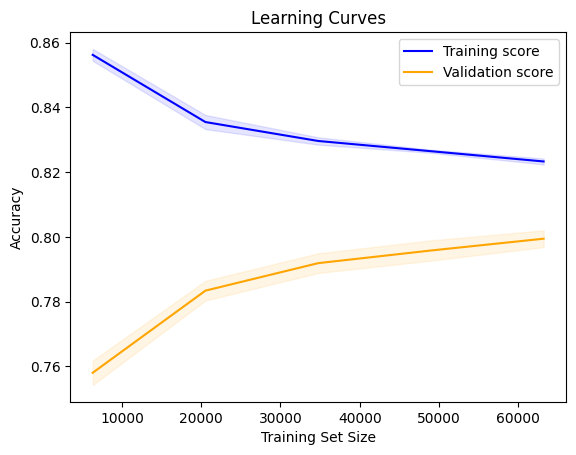

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Use learning_curve function from scikit-learn
train_sizes, train_scores, valid_scores = learning_curve(
    clf2, X_train_tfidf, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)  # Varying the size of the training set
)

# Calculate the mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plot learning curves
plt.plot(train_sizes, train_mean, label="Training score", color="blue")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.1)

plt.plot(train_sizes, valid_mean, label="Validation score", color="orange")
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, color="orange", alpha=0.1)

plt.title("Learning Curves")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()


**Well fitted !**

**(2) precision/recall의 threshold를 바꿔볼 필요는?**

Recall이 0.70으로 30%나 되는 혐오 표현들이 slipped 되었다 <br>
즉 Recall에 대한 Threshold를 높여보자 <br>
  1로 판별하기 어렵게

In [ ]:
# Predict probabilities for the validation set
y_valid_prob = clf.predict_proba(X_valid_tfidf)[:, 1]  # Probabilities for class 1 (non-hate speech)

# Set a lower threshold to increase recall and reduce FN
threshold = 0.58  # You can experiment with different values like 0.4, 0.3, etc.
y_valid_pred_thresh = (y_valid_prob >= threshold).astype(int)

# Evaluate the performance with the new threshold
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report with Lower Threshold:")
print(classification_report(y_valid, y_valid_pred_thresh))

print("Confusion Matrix with Lower Threshold:")
print(confusion_matrix(y_valid, y_valid_pred_thresh))


Classification Report with Lower Threshold:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      3889
           1       0.81      0.81      0.81      4887

    accuracy                           0.79      8776
   macro avg       0.79      0.79      0.79      8776
weighted avg       0.79      0.79      0.79      8776

Confusion Matrix with Lower Threshold:
[[2980  909]
 [ 908 3979]]


**클래스 불균형이 심하지 않기에 ROC Curve를 그려보자**

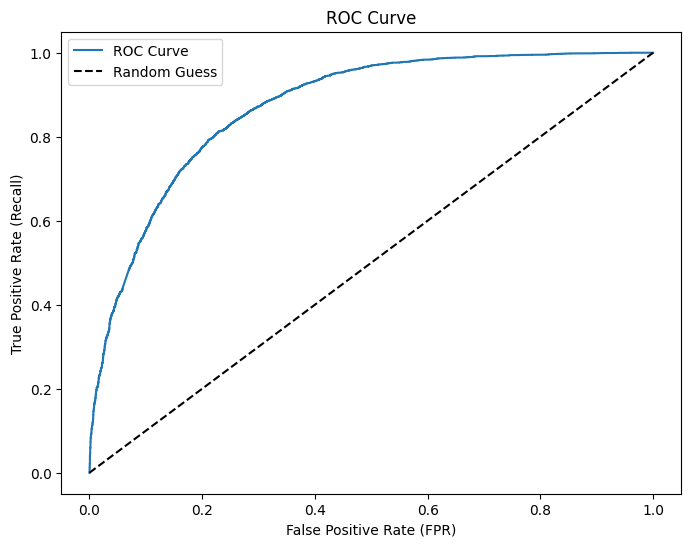

AUC Score: 0.87


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for class 1 (non-hate speech)
y_valid_prob = clf.predict_proba(X_valid_tfidf)[:, 1]

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_valid, y_valid_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()

# Compute the AUC (Area Under the Curve) score
auc_score = roc_auc_score(y_valid, y_valid_prob)
print(f"AUC Score: {auc_score:.2f}")


In [ ]:
# Find the optimal threshold: maximize TPR - FPR
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold based on ROC Curve: {optimal_threshold:.2f}")


Optimal Threshold based on ROC Curve: 0.58


In [ ]:
# Use the optimal threshold to classify validation data
y_valid_pred_optimal = (y_valid_prob >= optimal_threshold).astype(int)

# Evaluate the performance with the new threshold
print("Classification Report with Optimal Threshold:")
print(classification_report(y_valid, y_valid_pred_optimal))

print("Confusion Matrix with Optimal Threshold:")
print(confusion_matrix(y_valid, y_valid_pred_optimal))


Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      3889
           1       0.82      0.81      0.81      4887

    accuracy                           0.79      8776
   macro avg       0.79      0.79      0.79      8776
weighted avg       0.79      0.79      0.79      8776

Confusion Matrix with Optimal Threshold:
[[3000  889]
 [ 918 3969]]


1) overfitting/underfitting 확인 완료 <br>
2) recall thresholds 바꿨다

In [ ]:
import joblib
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
joblib.dump(clf2, '/content/drive/MyDrive/binary_logistic_regression_model.pkl')

Mounted at /content/drive


['/content/drive/MyDrive/binary_logistic_regression_model.pkl']

# 5) Test set

In [ ]:
import joblib
from google.colab import drive


model = joblib.load('/content/drive/MyDrive/binary_logistic_regression_model.pkl')

LogisticRegression(max_iter=1000)

In [ ]:
# Binarize the labels: 1 for label 8, 0 for all other labels
def binarize_label(label):
    # Check if the label is exactly '8'
    return 1 if label == '8' else 0

y_test = test_df['label'].apply(binarize_label)

# Predict on the test set with the optimal threshold
y_test_prob = clf2.predict_proba(X_test_tfidf)[:, 1]  # Probabilities for class 1
y_test_pred = (y_test_prob >= optimal_threshold).astype(int)

# Evaluate on the test set
print("Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

print("Confusion Matrix on Test Set:")
print(confusion_matrix(y_test, y_test_pred))

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.77      0.78      0.78     10120
           1       0.81      0.80      0.81     11819

    accuracy                           0.79     21939
   macro avg       0.79      0.79      0.79     21939
weighted avg       0.79      0.79      0.79     21939

Confusion Matrix on Test Set:
[[7940 2180]
 [2324 9495]]


**이정되면 됐으니 최종 모델 저장**

In [ ]:
import joblib
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
joblib.dump(clf2, '/content/drive/MyDrive/binary_logistic_regression_model_final.pkl')

Mounted at /content/drive


['/content/drive/MyDrive/binary_logistic_regression_model_final.pkl']

# 6) Connect to the Chatbot

In [ ]:
# 저장된 모델 및 TF-IDF 불러오기
import joblib
from google.colab import drive
drive.mount("/content/drive")

model = joblib.load('/content/drive/MyDrive/binary_logistic_regression_model_final.pkl')
vectorizer = joblib.load('/content/drive/MyDrive/tfidf_vectorizer.pkl')

Mounted at /content/drive


**유저의 인풋도 konlpy로 전처리를 해주어야 한다**

In [ ]:
!pip install konlpy
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer

okt = Okt()

def preprocess_text(text):
  tokens = okt.morphs(text)

  return ' '.join(tokens)


def classify_input(user_input):
    preprocessed_input = preprocess_text(user_input)
    user_input_tfidf = vectorizer.transform([preprocessed_input])  # Transform input using TF-IDF
    prediction = model.predict(user_input_tfidf)
    return prediction

print("")
print("-" * 50)
print("")


# Chatbot loop to get user input and respond
def chatbot():
    print("혐오 표현 챗봇 준비가 완료되었습니다! 입력을 해주세요!")

    while True:
        # Get user input
        user_input = input("학생: ")

        # Exit condition
        if user_input.lower() == "안녕히계세요" or user_input == "오늘은 여기까지만 하고싶어요":
            print("다음번에 봬요!")
            break

        # Classify the input using the trained model
        prediction = classify_input(user_input)

        # Respond based on the prediction
        if prediction == 0:  # 0 for hate speech
            print("챗봇: 해당 문장은 혐오 표현을 담고 있습니다 ㅜㅜ")
            print("")
            print("-" * 50)
        else:
            print("챗봇: 해당 문장은 사용하시기에 충분합니다!")
            print("")
            print("-" * 50)

# Run the chatbot
chatbot()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 30.5 MB/s eta 0:00:00

--------------------------------------------------

혐오 표현 챗봇 준비가 완료되었습니다! 입력을 해주세요!
학생: 한국에는 여자 비율이 어떻게 되나요?
챗봇: 해당 문장은 사용하시기에 충분합니다!

--------------------------------------------------
학생: 남자 몇명이야?
챗봇: 해당 문장은 사용하시기에 충분합니다!

--------------------------------------------------
학생: 남자들은 다 싫어
챗봇: 해당 문장은 사용하시기에 충분합니다!

--------------------------------------------------
학생: 남자들 제발 나갔으면!
챗봇: 해당 문장은 사용하시기에 충분합니다!

--------------------------------------------------
학생: 여자들 진짜 왜그래?
챗봇: 해당 문장은 사용하시기에 충분합니다!

--------------------------------------------------
학생: 난 한국여자랑은 결혼 안 할란다~
챗봇: 해당 문장은 혐오 표현을 담고 있습니다 ㅜㅜ

--------------------------------------------------
학생: 여자가 좋아
챗봇: 해당 문장은 사용하시기에 충분합니다!

--------------------------------------------------
학생: 안녕히계세요
다음번에 봬요!


**너무 간단한 챗봇이다. 특정 단어가 등장했을 때, 해당 단어에 대한 대안(alternative)을 제공할 수 있다면 어떨까?**

In [ ]:
# 혐오 표현에 대한 대안을 줄 수 있게끔


alternatives = {
    "월거지" : "사용하시면 안 됩니다!",
    "전거지" : "사용하시면 안 됩니다!",
    "이백충" : "사용하시면 안 됩니다!",
    "삼백충" : "사용하시면 안 됩니다!",
    "폭탄이야" : "사용하시면 안 됩니다!",
    "엠이" : "(엄마)를 써보는건 어떨까요?",
    "담탱이" : "(담임)을 써보는건 어떨까요?",
    "한남": "(남자)를 써보는건 어떨까요?",
    "한녀": "(여자)를 써보는건 어떨까요?",
    "노친네": "(어르신)을 써보는건 어떨까요?",
    "틀딱" : "(어르신)을 써보는건 어떨까요?"
}

**대체 단어 추가한 챗봇**

In [ ]:
!pip install konlpy
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer

okt = Okt()


alternatives = {
    "월거지" : "해당 문장은 혐오 표현을 담고 있습니다 ㅜㅜ",
    "전거지" : "해당 문장은 혐오 표현을 담고 있습니다 ㅜㅜ",
    "이백충" : "해당 문장은 혐오 표현을 담고 있습니다 ㅜㅜ",
    "삼백충" : "해당 문장은 혐오 표현을 담고 있습니다 ㅜㅜ",
    "폭탄이야" : "해당 문장은 혐오 표현을 담고 있습니다 ㅜㅜ",
    "엠이" : "(엄마)를 써보는건 어떨까요?",
    "담탱이" : "(담임)을 써보는건 어떨까요?",
    "한남": "(남자)를 써보는건 어떨까요?",
    "한녀": "(여자)를 써보는건 어떨까요?",
    "노친네": "(어르신)을 써보는건 어떨까요?",
    "틀딱" : "(어르신)을 써보는건 어떨까요?"
}

def preprocess_text(text):
  tokens = okt.morphs(text)

  return ' '.join(tokens)


def classify_input(user_input):
    preprocessed_input = preprocess_text(user_input)
    user_input_tfidf = vectorizer.transform([preprocessed_input])  # Transform input using TF-IDF
    prediction = model.predict(user_input_tfidf)
    return prediction


def check_alternatives(user_input):
    for word in alternatives:
        if word in user_input:
            return alternatives[word]
    return None


print("")
print("-" * 50)
print("")





# Chatbot loop to get user input and respond
def chatbot():
    print("혐오 표현 챗봇 준비가 완료되었습니다! 입력을 해주세요!")

    while True:
        # Get user input
        user_input = input("학생: ")

        # Exit condition
        if user_input.lower() == "안녕히계세요" or user_input == "오늘은 여기까지만 하고싶어요":
            print("다음번에 봬요!")
            break

        # 혐오 표현 대체 단어가 있는지 확인
        alternative_response = check_alternatives(user_input)
        if alternative_response:
            print(f"챗봇: {alternative_response}")
            print("")
            print("-" * 50)
            continue


        # Classify the input using the trained model
        prediction = classify_input(user_input)

        # Respond based on the prediction
        if prediction == 0:  # 0 for hate speech
            print("챗봇: 해당 문장은 혐오 표현을 담고 있습니다 ㅜㅜ")
            print("")
            print("-" * 50)
        else:
            print("챗봇: 해당 문장은 사용하시기에 충분합니다!")
            print("")
            print("-" * 50)

# Run the chatbot
chatbot()


--------------------------------------------------

혐오 표현 챗봇 준비가 완료되었습니다! 입력을 해주세요!
챗봇: (담임)을 써보는건 어떨까요?

--------------------------------------------------
챗봇: 해당 문장은 혐오 표현을 담고 있습니다 ㅜㅜ

--------------------------------------------------
챗봇: (어르신)을 써보는건 어떨까요?

--------------------------------------------------
다음번에 봬요!


# mislabeling된 데이터가 있을까?

In [ ]:
# 저장된 모델 및 TF-IDF 불러오기
import joblib
from google.colab import drive
drive.mount("/content/drive")

model = joblib.load('/content/drive/MyDrive/binary_logistic_regression_model_final.pkl')
vectorizer = joblib.load('/content/drive/MyDrive/tfidf_vectorizer.pkl')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 트레이닝 데이터셋의 레이블 8의 mislabeling확인해보기

train_df
label_8 = train_df[train_df['label'] == '8']
label_8

label_8_tfidf = vectorizer.transform(label_8['preprocessed_text'])
predictions = model.predict(label_8_tfidf)

hate_speech_predictions = label_8[predictions == 0]

sample_hate_speech = hate_speech_predictions['document'].head(10)

for idx, sentence in enumerate(sample_hate_speech):
    print(f"혐오 표현으로 예측된 문장 {idx+1}: {sentence}")

혐오 표현으로 예측된 문장 1: 공통점은 한국남자?
혐오 표현으로 예측된 문장 2: 50어 애나서 언제 길러요?
혐오 표현으로 예측된 문장 3: "이여인 관상자체가.."
혐오 표현으로 예측된 문장 4: 남자도 성형이 많다니..성형공화국답다
혐오 표현으로 예측된 문장 5: 누구신지. . .존재감 없는
혐오 표현으로 예측된 문장 6: "섬나라로 가라..."
혐오 표현으로 예측된 문장 7: "느그나라 북한? 전라도?"
혐오 표현으로 예측된 문장 8: 이혼이 무순 자랑이라고.. 옛날같으면 평생고개를 못들고 다니는 죄인인데.
혐오 표현으로 예측된 문장 9: 여자 얼굴값하게 생긴네..색기도 많아 보이고... 남자가 불쌍타..ㅉㅉ
혐오 표현으로 예측된 문장 10: 니미 백년전꺼도 꺼내봐라


In [ ]:
import pandas as pd

# TF-IDF 벡터라이저로부터 단어들에 대한 가중치 추출
tfidf_weights = vectorizer.transform(train_df['preprocessed_text'])  # 'preprocessed_text' 컬럼은 전처리된 텍스트

# TF-IDF 가중치 데이터를 DataFrame으로 변환
tfidf_df = pd.DataFrame(tfidf_weights.toarray(), columns=vectorizer.get_feature_names_out())

# TF-IDF 가중치 출력
print(tfidf_df)

# 각 단어의 평균 TF-IDF 점수 계산
mean_tfidf_scores = tfidf_df.mean(axis=0)

# 평균 TF-IDF 값이 높은 상위 10개 단어 출력
top_n_words = mean_tfidf_scores.sort_values(ascending=False).head(10)
print(top_n_words)


        10  100  100만  10년  10만  10억   11  11년   12   13  ...   히트   힐링  힘내라  \
0      0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1      0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2      0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3      0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4      0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...    ...  ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
78972  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
78973  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
78974  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
78975  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
78976  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       힘내세요  힘내요   힘든  힘들게  힘들다  힘들어   